In [88]:
import argparse
import sys
import yt
import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = (12,9)

In [89]:
idx_start = 0
idx_end = 312
didx = 15

colormap = 'arbre'
field = 'density'
center_mode = 'c'
dpi = 1000

code_units = { "length_unit":(1.0,"kpc"),
               "time_unit"  :(3.08567758096e+13,"s"),
               "mass_unit"  :(1.4690033e+36,"g") }

In [15]:
ts = yt.load(['Data_%06d'%idx for idx in range(idx_start,idx_end+1,didx)])

In [40]:
ds = yt.load("Data_000000")

yt : [WARNING  ] 2018-07-16 10:16:22,903 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-07-16 10:16:22,905 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-07-16 10:16:22,906 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-07-16 10:16:22,907 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-07-16 10:16:22,920 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-07-16 10:16:22,921 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-16 10:16:22,922 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-07-16 10:16:22,923 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-07-16 10:16:22,924 Parameters: cosmological_simulation   = 0


In [5]:
for ds in ts.piter():
    
    sz = yt.SlicePlot(ds,'y','density')
    sz.set_zlim(field,10e-32,10e-27)
    sz.set_log(field,True)
    sz.set_cmap(field,colormap)
#     sz.set_unit(field,'g/cm**3')
#     sz.set_axes_unit('kpc')
#     sz.annotate_timestamp(time_unit='code_time',corner='upper_right',
#                          time_format='t = {time:.4f} {units}')
#     sz.annotate_grids(periodic=False)
#     sz.show()
#     sz.save(name=str(ds)+'_SlicePlot_Density.png')

In [6]:
for ds in ts.piter():
    
    sz = ds.r[:].profile("velocity_magnitude", "cell_volume", weight_field=None).plot()
    sz.set_xlim(3e6,8e9)
    sz.set_ylim('cell_volume',10e56,15e63)
#     sz.show()
    sz.save(name=str(ds)+'_PhasePlot.png')

In [7]:
for ds in ts.piter():
    
    sz = yt.ProjectionPlot(ds,'y','density',weight_field='density')
    sz.set_zlim(field,10e-29,10e-27)
    sz.set_log(field,True)
    sz.set_cmap(field,colormap)
#     sz.set_unit(field,'g/cm**3')
#     sz.set_axes_unit('kpc')
#     sz.annotate_timestamp(time_unit='code_time',corner='upper_right',
#                          time_format='t = {time:.4f} {units}')
#     sz.annotate_grids(periodic=False)
#     sz.show()
#     sz.save(name='ProjectionPlot_Density_' + str(ds) + '.png')

s = yt.SlicePlot(ds,'y','density')
s.show()

In [8]:
s2 = yt.SlicePlot(ds,'y','pressure')
s2.show()

In [9]:
p = yt.ProjectionPlot(ds, 'y', 'density')
p.show()

In [10]:
p = yt.ProjectionPlot(ds, 'y', 'pressure')
p.show()

In [11]:
p = yt.ProjectionPlot(ds, 'y', 'temperature')
p.show()

In [12]:
ds.periodicity = (True,True,True)

sc = yt.create_scene(ds, lens_type='perspective')

sc.camera.set_width(ds.quan(100,'kpc'))
source = sc[0]

# source.tfh.set_bounds((1e-31, 5e-26))
# source.tfh.set_log(True)
# source.tfh.grey_opacity = False

source.set_field('density')
source.set_log(True)
# source.set_use_ghost_zones(True)

bounds = (3.5e-3, 1e2)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(np.log10(bounds))

tf.add_layers(5, colormap='viridis_r')

source.tfh.tf = tf
source.tfh.bounds = bounds

# sc.camera.zoom(5)
sc.show(sigma_clip=4.0)
# sc.save(fname='sphericalcollapse_temp_symmgeom.png',sigma_clip=6.0)

source.tfh.plot(profile_field='density')

In [85]:
# ms = sc.get_source()
# ms.cmap = 'viridis_r'

# cam = sc.camera
# cam.focus = ds.arr([0.0, 0.0, 0.0], 'code_length')
# cam_pos = ds.arr([-3.0, -3.0, -3.0], 'code_length')
# north_vector = ds.arr([0.0, -1.0, -1.0], 'dimensionless')
# cam.set_position(cam_pos, north_vector)

# cam.resolution = (800, 800)

# cam.steady_north = True

# num_frames = 20
# for i in range(num_frames):
#     cam.rotate(2.0*np.pi/num_frames)
#     sc.render()
#     sc.save('/home/cass/desktop/turk_research/images/surface_render_%.4d.png' % i)

In [36]:
fields = ['density','velocity_magnitude','velocity_x','velocity_y',
          'velocity_z']

In [13]:
for i in fields:
    for j in ['x','y','z']:
        s = yt.SlicePlot(ds,j,i)
        s.show()
#         s.save(name=str(i)+ '_' + str(j) + '_slice.png')

In [150]:
alld = ds.all_data()

In [147]:
E_k = []
M_s = []
rho_extr = []
times = []
for ds in ts:
    dd = ds.all_data()
    rho_extr.append(dd.quantities.extrema("density"))
    E_k.append(dd.mean("kinetic_energy"))
    M_s.append(dd.mean("mach_number"))
    times.append(ds.current_time)
rho_extr = np.array(rho_extr)
E_k = np.array(E_k)
M_s = np.array(M_s)

yt : [WARNING  ] 2018-07-02 14:24:42,088 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-07-02 14:24:42,089 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-07-02 14:24:42,090 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-07-02 14:24:42,091 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-07-02 14:24:42,099 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-07-02 14:24:42,100 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-02 14:24:42,101 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-07-02 14:24:42,102 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-07-02 14:24:42,103 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2018-07-02 14:24:55,091 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-07-02 14:24:55,093 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-07-02 14:24:55,094 Assuming

yt : [INFO     ] 2018-07-02 14:27:02,463 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-02 14:27:02,464 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-07-02 14:27:02,465 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-07-02 14:27:02,465 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2018-07-02 14:27:16,296 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-07-02 14:27:16,298 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-07-02 14:27:16,300 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-07-02 14:27:16,301 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-07-02 14:27:16,311 Parameters: current_time              = 0.08250000000000006
yt : [INFO     ] 2018-07-02 14:27:16,312 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-02 14:27:16,313 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-07-02 14

/home/cwagner4/applications/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


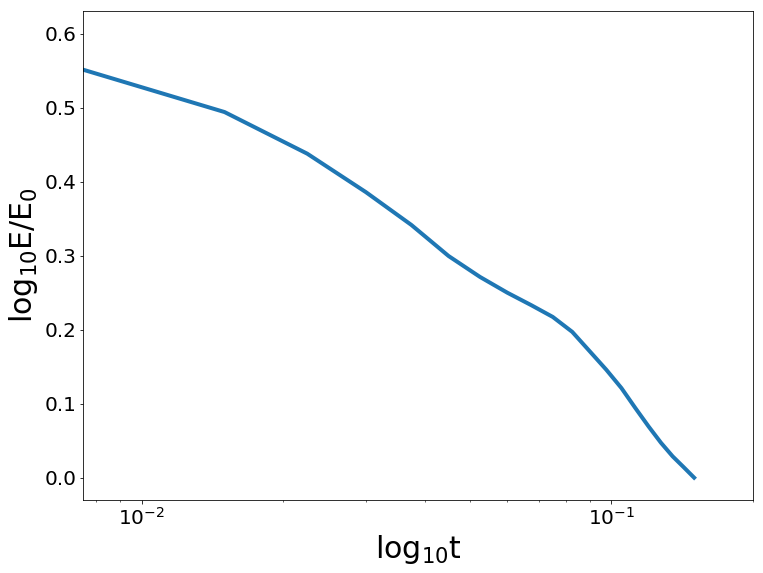

In [161]:
pylab.semilogx(times, np.log10((E_k)/alld.mean('kinetic_energy')),lw=4) 
pylab.ylabel(r"$\log_{10} \mathrm{E/E_{0}}$",fontsize=30)
pylab.xlabel(r"$\log_{10} \mathrm{t}$",fontsize=30)                        # need t_s, not sure what that is
pylab.xlim(0, 0.2)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.show()

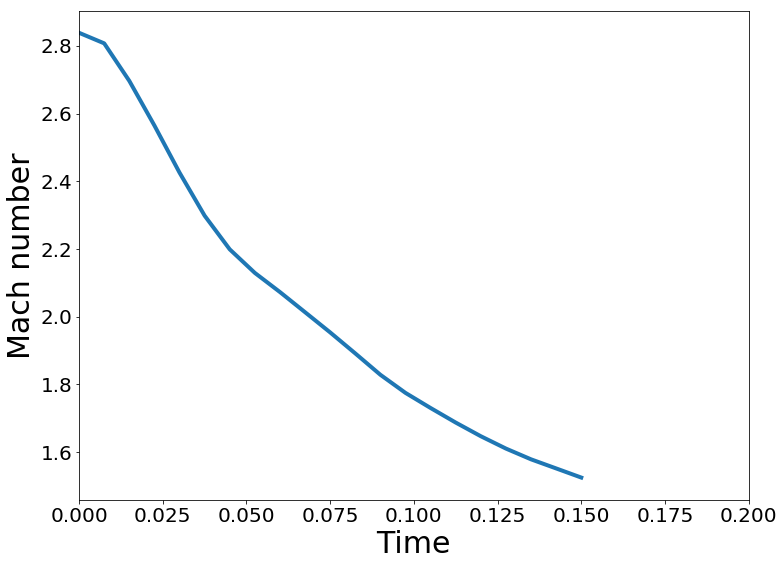

In [90]:
pylab.plot(times, M_s,lw=4)
pylab.ylabel("Mach number",fontsize=30)
pylab.xlabel("Time",fontsize=30)
pylab.xlim(0, 0.2)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.show()

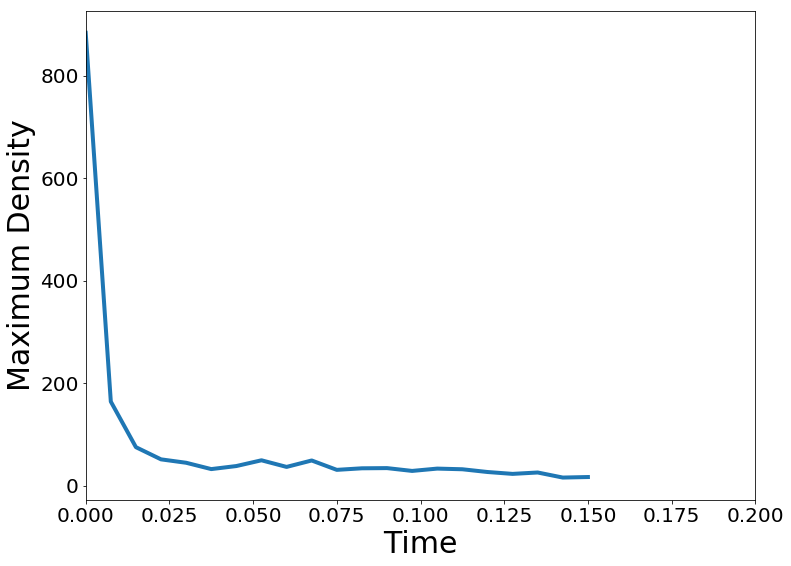

In [71]:
pylab.plot(times, rho_extr[:,1],lw=4)
pylab.ylabel("Maximum Density",fontsize=30)
pylab.xlabel("Time",fontsize=30)
pylab.xlim(0, 0.2)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.show()

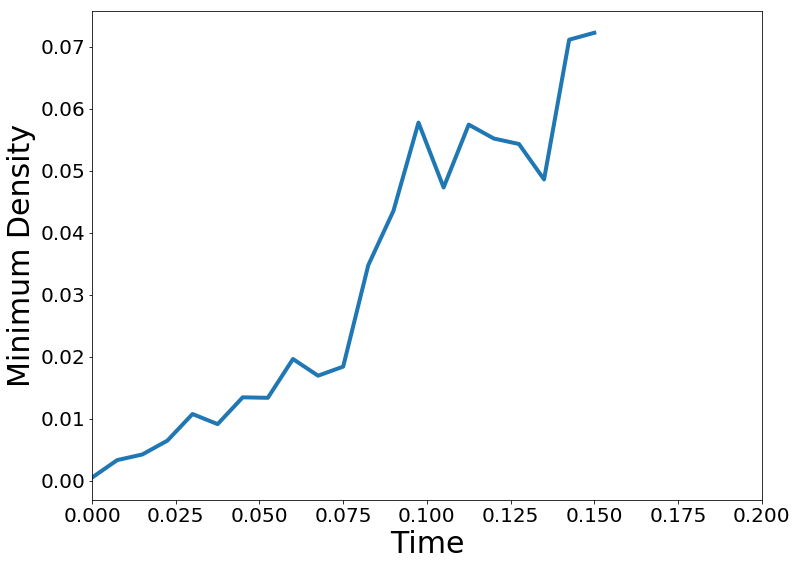

In [99]:
pylab.plot(times, rho_extr[:,0],lw=4)
pylab.ylabel("Minimum Density",fontsize=30)
pylab.xlabel("Time",fontsize=30)
pylab.xlim(0, 0.2)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.show()

In [ ]:
pylab.plot(times, M_a,lw=4)
pylab.ylabel("Alfven number",fontsize=30)
pylab.xlabel("Time",fontsize=30)
pylab.xlim(0, 0.2)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.show()

In [90]:
ds = yt.load("Data_000000")

yt : [WARNING  ] 2018-07-16 13:56:20,896 Cannot determine code units ==> Use units_override to specify the units
yt : [WARNING  ] 2018-07-16 13:56:20,897 Assuming length unit = 1.0 cm
yt : [WARNING  ] 2018-07-16 13:56:20,898 Assuming time unit = 1.0 s
yt : [WARNING  ] 2018-07-16 13:56:20,899 Assuming mass unit = 1.0 g
yt : [INFO     ] 2018-07-16 13:56:20,907 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-07-16 13:56:20,907 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-16 13:56:20,908 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-07-16 13:56:20,909 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-07-16 13:56:20,910 Parameters: cosmological_simulation   = 0


In [80]:
pressure = ds.all_data().mean('pressure')
pressure

6.521453389405525 dyne/cm**2

In [81]:
M_s = ds.all_data().mean('mach_number')
M_s

3.8724536753027623 dimensionless

In [82]:
c_s = ds.all_data().mean('sound_speed')
c_s

3.876326129027881 cm/s

In [83]:
v_mag = ds.all_data().mean('velocity_magnitude')
v_mag

17.721904225657397 cm/s

In [84]:
density=ds.all_data().mean('density')
density

1.0000000000309863 g/cm**3

In [85]:
np.sqrt(1.001*pressure/density)

2.554990184441547 sqrt(cm)*sqrt(dyne)/sqrt(g)

In [86]:
M_s*c_s

15.010893365026147 cm/s

In [87]:
np.sqrt(pressure)

2.5537136467124744 sqrt(dyne)/cm

In [91]:
print(ds.fields.gas.sound_speed.get_source())

    def _sound_speed(field, data):
        tr = data.ds.gamma * data[ftype, "pressure"] / data[ftype, "density"]
        return np.sqrt(tr)



Derived Field (gas, pressure): (units: dyne/cm**2)